# Outlier Trimming and Capping IQR

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# for Q-Q plots
import scipy.stats as stats
# boston house dataset for the demo
from sklearn.datasets import load_boston

# Read Data and Split and into Train and Test

In [ ]:
boston_dataset = load_boston()

In [3]:
boston = pd.DataFrame(boston_dataset.data,
                      columns=boston_dataset.feature_names)[[
                          'RM', 'LSTAT', 'CRIM'
                      ]]

boston.max()

RM        8.7800
LSTAT    37.9700
CRIM     88.9762
dtype: float64

In [ ]:
boston.mean()+3*boston.std()

RM        8.392486
LSTAT    34.076248
CRIM     29.418159
dtype: float64

In [6]:
def doagnostic_plot(df,feature_name):
   # define figure size
    plt.figure(figsize=(16, 4))
    # histogram
    plt.subplot(1, 3, 1)
    sns.histplot(df[feature_name], bins=30)
    plt.title('Histogram')

    # Q-Q plot
    plt.subplot(1, 3, 2)
    stats.probplot(df[feature_name], dist="norm", plot=plt)
    plt.ylabel('Variable quantiles')

    # boxplot
    plt.subplot(1, 3, 3)
    sns.boxplot(y=df[feature_name])
    plt.title('Boxplot')

    plt.show()

In [4]:
boston.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RM      506 non-null    float64
 1   LSTAT   506 non-null    float64
 2   CRIM    506 non-null    float64
dtypes: float64(3)
memory usage: 12.0 KB


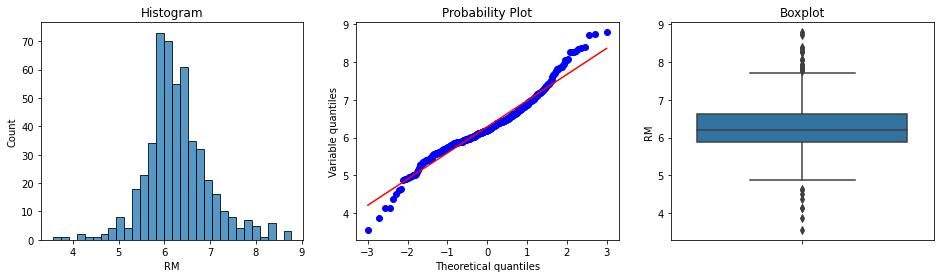

In [9]:
doagnostic_plot(boston,'RM')

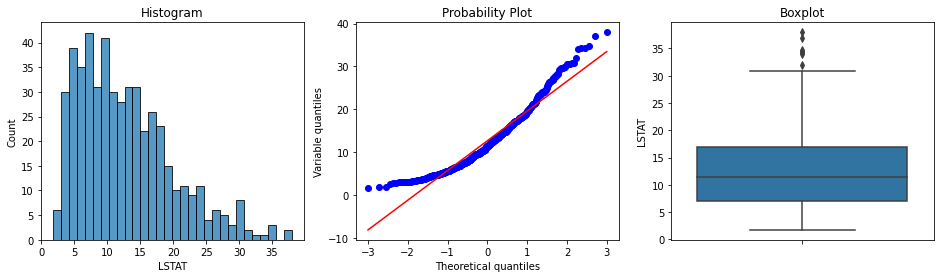

In [18]:
doagnostic_plot(boston,'LSTAT')

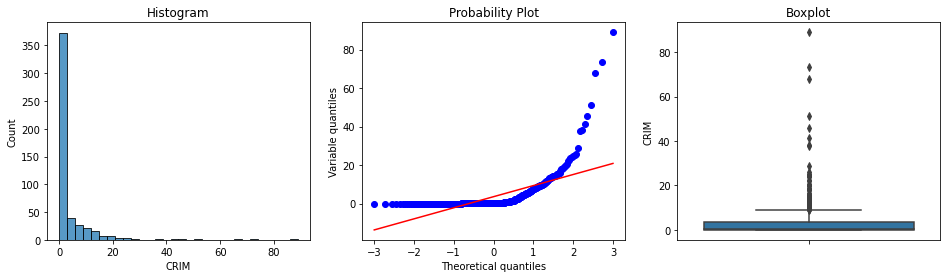

In [ ]:
doagnostic_plot(boston,'CRIM')

In [8]:
boston.skew()

RM       0.403612
LSTAT    0.906460
CRIM     5.223149
dtype: float64

In [15]:
def find_skewed_boundaries(df, variable, distance):
  IQR = df[variable].quantile(0.75) - df[variable].quantile(0.25)
  lower_boundary = df[variable].quantile(0.25) - (IQR * distance)
  upper_boundary = df[variable].quantile(0.75) + 3 * IQR
  return lower_boundary,upper_boundary


In [45]:
lb_RM,up_RM= find_skewed_boundaries(boston, 'RM', 1.5)
lb_RM,up_RM

(4.778499999999999, 8.837500000000002)

In [46]:
lb_LSTAT,up_LSTAT=find_skewed_boundaries(boston, 'LSTAT', 1.5)

In [47]:
lb_CRIM,up_CRIM=find_skewed_boundaries(boston, 'CRIM', 1.5)

# Find outliers from the Features

In [ ]:
#Numpy Method
outliers_RM=np.where(boston['RM']<lb_RM ,True, np.where(boston['RM']>up_RM,True,False))
boston[outliers_RM]

In [49]:
# Pandas Fitering Method
outliers_mask_RM=(boston['RM']>up_RM ) | ( boston['RM']<lb_RM)
outliers_mask_LSTAT=(boston['LSTAT']>up_LSTAT ) | ( boston['LSTAT']<lb_LSTAT)
outliers_mask_CRIM=(boston['CRIM']>up_CRIM ) | ( boston['CRIM']<lb_CRIM)

In [59]:
trimmed_df=boston[~(outliers_mask_RM+outliers_mask_LSTAT+outliers_mask_CRIM)]

In [61]:
trimmed_df.skew()
#boston.skew()

RM       0.922940
LSTAT    0.886862
CRIM     2.017703
dtype: float64

In [69]:
trimmed_df.shape,boston.shape

((474, 3), (506, 3))

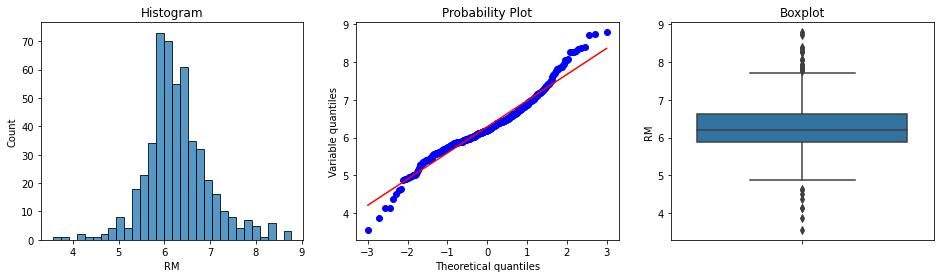

In [67]:
doagnostic_plot(boston,'RM')

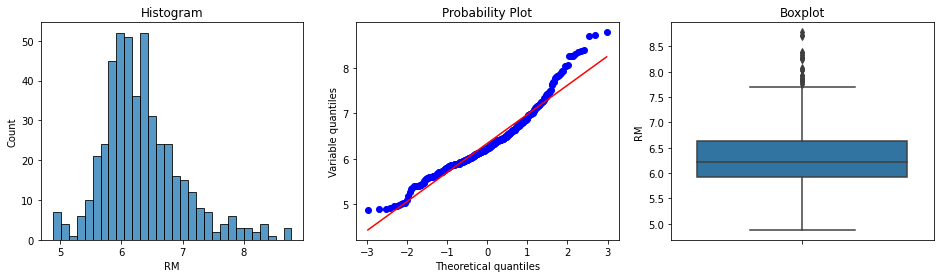

In [68]:
doagnostic_plot(trimmed_df,'RM')